In [48]:
import numpy as np
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

bg1_image = cv2.imread("GreenBackground.png", 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread("Object.png", 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread("NewBackground.jpg", 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

In [49]:
def compute_difference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype("uint8")

    return difference_single_channel

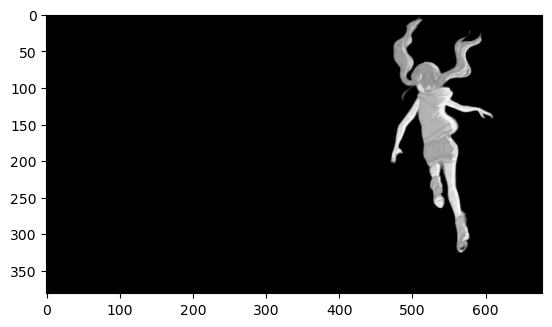

In [58]:
difference_single_channel = compute_difference(bg1_image, ob_image)
image = plt.imshow(difference_single_channel, cmap="gray")
plt.show()

In [60]:
def compute_binarymask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,) * 3, axis=-1)
    return difference_binary

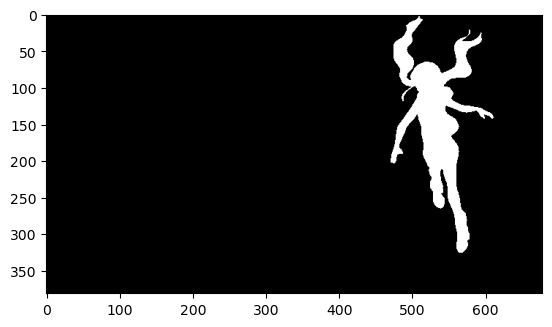

In [66]:
binary_mask = compute_binarymask(difference_single_channel)
image = plt.imshow(binary_mask)
plt.show()

In [61]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binarymask(difference_single_channel)

    output = np.where(binary_mask == 255, ob_image, bg2_image)

    return output

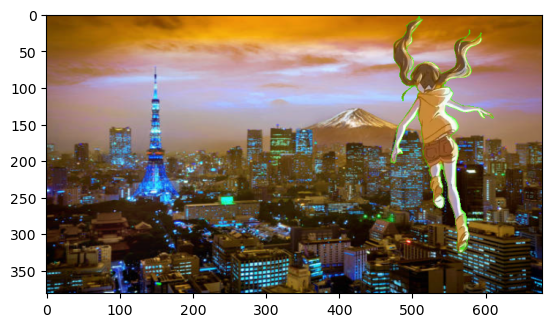

In [68]:
output = replace_background(bg1_image, bg2_image, ob_image)
image = plt.imshow(output)
plt.show()